# rBergomi GLU training

In [1]:
import gzip
import numpy as np

import torch
import torch.nn as nn
import torch.utils

import sys
sys.path.append('..')
from rBergomi_utils import *

## 数据读取

In [2]:
xx, yy, strikes, maturities = data_read(r"../../../Data/rBergomiTrainSet.txt.gz")

网格数据形状：(40000, 92)
参数形状：(40000, 4)
隐含波动率曲面形状：(40000, 88)
参数上界: [ 0.16      4.       -0.100011  0.499998]
参数下界: [ 0.0100133  0.300028  -0.949934   0.0250066]


In [3]:
# 训练集的 Upper and Lower Bounds
upper_bound = np.array([0.16,4,-0.1,0.5])
lower_bound = np.array([0.01,0.3,-0.95,0.025])

## 训练 & 测试集 构建

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 分割数据集
x_train, x_test, y_train, y_test = train_test_split( 
    xx, yy, 
    test_size=0.15, 
    random_state=42
)

# 构建标准化的 train test data
scale_x, scale_y = StandardScaler(), StandardScaler() 

x_train_transform = params_scaler(x_train, upper_bound, lower_bound) 
x_test_transform = params_scaler(x_test, upper_bound, lower_bound)

y_train_transform, y_test_transform = y_transform(y_train, y_test, scale_y)

In [5]:
# 查找 GPU 
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = torch.device(device)
print(f"使用设备: {device}")

使用设备: cuda


In [6]:
# 确定训练数据
train_dataset = torch.utils.data.TensorDataset( 
    torch.from_numpy(x_train_transform).to(device=device),
    torch.from_numpy(y_train_transform).to(device=device)
)

test_dataset = torch.utils.data.TensorDataset( 
    torch.from_numpy(x_test_transform).to(device=device),
    torch.from_numpy(y_test_transform).to(device=device)
)


train_data = (torch.from_numpy(x_train_transform).to(device=device),torch.from_numpy(y_train_transform).to(device=device))

test_data = (torch.from_numpy(x_test_transform).to(device=device),torch.from_numpy(y_test_transform).to(device=device))


data_loader = torch.utils.data.DataLoader( 
    train_dataset, batch_size=32, shuffle=True
)

## 训练

----------------------------------- Epoch: 1/10 -----------------------------------
Batch: 0%, Loss: 1.4940130636892377
Test Loss: 1.302977167158428
Batch: 0%, Loss: 1.2767588123113833
Test Loss: 1.2227643883390436
Batch: 0%, Loss: 1.3171931675786717
Test Loss: 1.149302022761411
Batch: 0%, Loss: 1.3051208924396243
Test Loss: 1.0811213908738362
Batch: 0%, Loss: 1.0021836513340767
Test Loss: 1.0164930982468383
Batch: 0%, Loss: 0.8712640504582769
Test Loss: 0.9567290894882695
Batch: 0%, Loss: 1.202875671722472
Test Loss: 0.8989578722936428
Batch: 0%, Loss: 0.9735818738535765
Test Loss: 0.8400605757143053
Batch: 0%, Loss: 0.7861124762043098
Test Loss: 0.7826475201940796
Batch: 0%, Loss: 0.8072979549883644
Test Loss: 0.7270723914197232
Batch: 0%, Loss: 0.5182317336134326
Test Loss: 0.6738732263438775
Batch: 0%, Loss: 0.6617610592092183
Test Loss: 0.6222768700214969
Batch: 0%, Loss: 0.7140501308001088
Test Loss: 0.5712410580417691
Batch: 0%, Loss: 0.5370045217715892
Test Loss: 0.522124888658

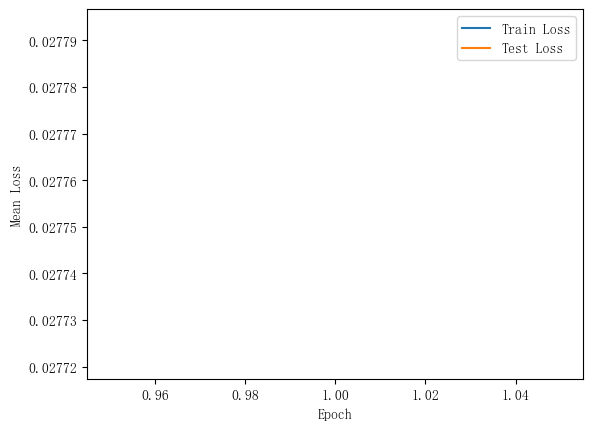

----------------------------------- Epoch: 2/10 -----------------------------------
Batch: 0%, Loss: 0.026869201602924598
Test Loss: 0.02766403297421815
Batch: 0%, Loss: 0.023318781743036223
Test Loss: 0.02725541879288026
Batch: 0%, Loss: 0.02871103566767866
Test Loss: 0.026993225090217864
Batch: 0%, Loss: 0.023334699723536
Test Loss: 0.026671656284256228
Batch: 0%, Loss: 0.03244212892247425
Test Loss: 0.0263348720414561
Batch: 0%, Loss: 0.022200420067720373
Test Loss: 0.02567227476720618
Batch: 0%, Loss: 0.028089592220845058
Test Loss: 0.02525472254526419
Batch: 0%, Loss: 0.021462930105142053
Test Loss: 0.02509528856999041
Batch: 0%, Loss: 0.025099009557840824
Test Loss: 0.024536677354328233
Batch: 0%, Loss: 0.024239154947313258
Test Loss: 0.02436524677741428
Batch: 0%, Loss: 0.021569459314735872
Test Loss: 0.023815313359458763
Batch: 0%, Loss: 0.027953113478399582
Test Loss: 0.023581583094708754
Batch: 0%, Loss: 0.020317918970817646
Test Loss: 0.0232091927192383
Batch: 0%, Loss: 0.01

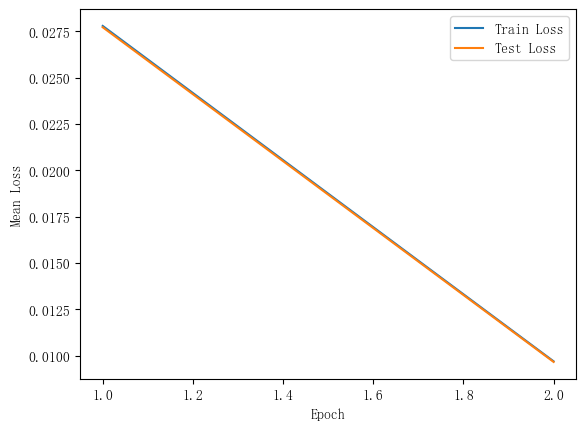

----------------------------------- Epoch: 3/10 -----------------------------------
Batch: 0%, Loss: 0.008491995093476935
Test Loss: 0.009652086262023385
Batch: 0%, Loss: 0.013660871244486476
Test Loss: 0.009525751709157051
Batch: 0%, Loss: 0.0065639961336281
Test Loss: 0.009469032148286738
Batch: 0%, Loss: 0.011396980343561213
Test Loss: 0.00941687245858067
Batch: 0%, Loss: 0.007120480094029128
Test Loss: 0.009406333341306698
Batch: 0%, Loss: 0.006594102342048277
Test Loss: 0.009329481911643676
Batch: 0%, Loss: 0.006980936161531201
Test Loss: 0.009241039249313096
Batch: 0%, Loss: 0.0073125697549114126
Test Loss: 0.009159534087753897
Batch: 0%, Loss: 0.00963516098361195
Test Loss: 0.009085893136155073
Batch: 0%, Loss: 0.0082755739582712
Test Loss: 0.009023534863047696
Batch: 0%, Loss: 0.009674425334108236
Test Loss: 0.009082147003176062
Batch: 0%, Loss: 0.009967399482134593
Test Loss: 0.008946663068173705
Batch: 0%, Loss: 0.006267228939301055
Test Loss: 0.008957219810646486
Batch: 0%, 

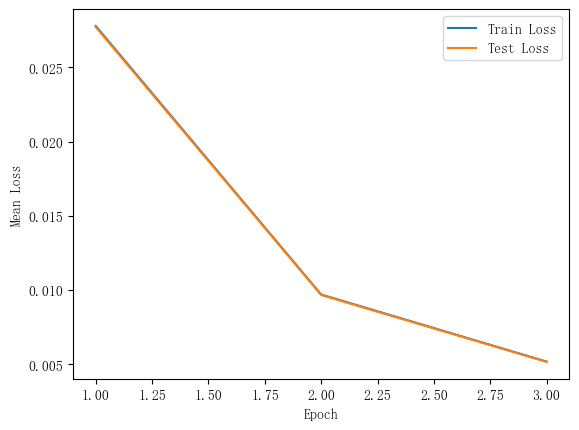

----------------------------------- Epoch: 4/10 -----------------------------------
Batch: 0%, Loss: 0.004176856743702656
Test Loss: 0.005156852890155257
Batch: 0%, Loss: 0.004160392657814075
Test Loss: 0.005111706343873205
Batch: 0%, Loss: 0.005561250846385398
Test Loss: 0.005056648479996034
Batch: 0%, Loss: 0.005592812554995039
Test Loss: 0.0050358334869007575
Batch: 0%, Loss: 0.004725550915186992
Test Loss: 0.0049884603391903036
Batch: 0%, Loss: 0.004373611297405222
Test Loss: 0.00498892885358535
Batch: 0%, Loss: 0.005094025229989083
Test Loss: 0.004987083441126694
Batch: 0%, Loss: 0.004331524457465032
Test Loss: 0.004914594411414841
Batch: 0%, Loss: 0.004254982675238147
Test Loss: 0.004860607942314109
Batch: 0%, Loss: 0.005365566525602334
Test Loss: 0.00491698646552071
Batch: 0%, Loss: 0.004732613210270967
Test Loss: 0.0048897528282481496
Batch: 0%, Loss: 0.004954920781276232
Test Loss: 0.004870020993992585
Batch: 0%, Loss: 0.003961450028188099
Test Loss: 0.004868842244041087
Batch

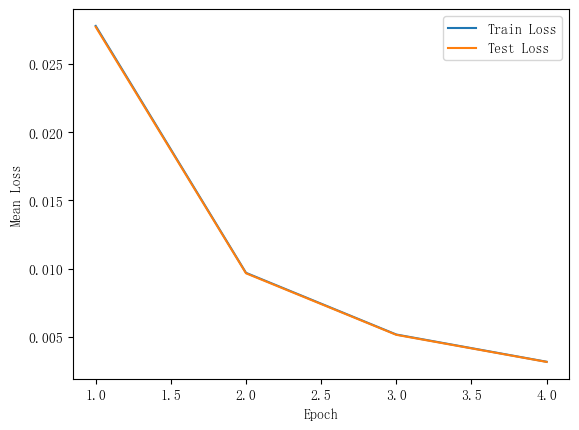

----------------------------------- Epoch: 5/10 -----------------------------------
Batch: 0%, Loss: 0.002307847828987373
Test Loss: 0.003193329990257061
Batch: 0%, Loss: 0.0029565324086383666
Test Loss: 0.0031033562135818734
Batch: 0%, Loss: 0.0044961271859036474
Test Loss: 0.0030963175030853923
Batch: 0%, Loss: 0.0027911385840476617
Test Loss: 0.0031260057305788178
Batch: 0%, Loss: 0.0032759937445099685
Test Loss: 0.0032865473240745414
Batch: 0%, Loss: 0.00193005989570542
Test Loss: 0.0030458355726927433
Batch: 0%, Loss: 0.0035352143207684527
Test Loss: 0.0030620734892369363
Batch: 0%, Loss: 0.003379081864214687
Test Loss: 0.0030180320336037018
Batch: 0%, Loss: 0.0027220719932225497
Test Loss: 0.002994854391590128
Batch: 0%, Loss: 0.00322890080942074
Test Loss: 0.00301303971296302
Batch: 0%, Loss: 0.0029337975892727765
Test Loss: 0.0029954158991244975
Batch: 0%, Loss: 0.0031179167386854814
Test Loss: 0.0029717164563694116
Batch: 0%, Loss: 0.0027713507075397305
Test Loss: 0.0029713166

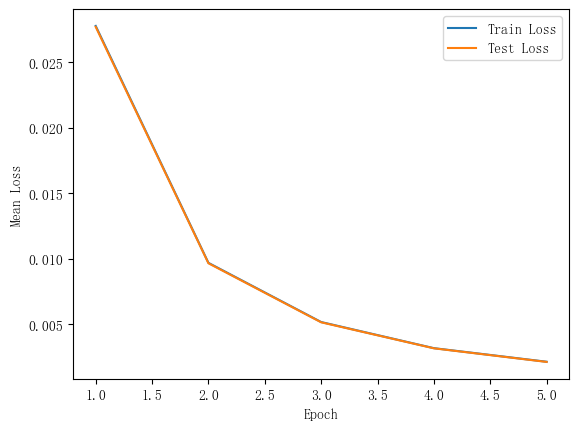

----------------------------------- Epoch: 6/10 -----------------------------------
Batch: 0%, Loss: 0.0028520873959241755
Test Loss: 0.00214673490789834
Batch: 0%, Loss: 0.0016693032845429762
Test Loss: 0.0021918192582461356
Batch: 0%, Loss: 0.0023900366136557325
Test Loss: 0.0021000665223510967
Batch: 0%, Loss: 0.002435255343866958
Test Loss: 0.0021132794125879777
Batch: 0%, Loss: 0.0016812380043913116
Test Loss: 0.002143547410465371
Batch: 0%, Loss: 0.0026966871243123552
Test Loss: 0.002161668629769102
Batch: 0%, Loss: 0.00220040392206564
Test Loss: 0.0021177664427839576
Batch: 0%, Loss: 0.001883902283751724
Test Loss: 0.00221374650165223
Batch: 0%, Loss: 0.002230989326852057
Test Loss: 0.002082195034701109
Batch: 0%, Loss: 0.00195661587326167
Test Loss: 0.0020769726379072273
Batch: 0%, Loss: 0.0018598181916437174
Test Loss: 0.0020601894342650033
Batch: 0%, Loss: 0.0015595649372979012
Test Loss: 0.0020641992733725625
Batch: 0%, Loss: 0.0020235460526483885
Test Loss: 0.00209264274334

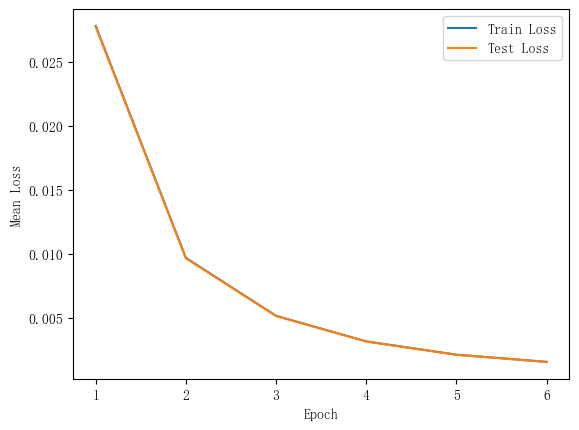

----------------------------------- Epoch: 7/10 -----------------------------------
Batch: 0%, Loss: 0.0017658789569328182
Test Loss: 0.0015916745352792423
Batch: 0%, Loss: 0.0015731574271899203
Test Loss: 0.0015928627342587335
Batch: 0%, Loss: 0.0014250511676561042
Test Loss: 0.0015763039414691332
Batch: 0%, Loss: 0.001210687958928262
Test Loss: 0.0016023240834050214
Batch: 0%, Loss: 0.00129366141104182
Test Loss: 0.0015727753579098385
Batch: 0%, Loss: 0.0015889960844277355
Test Loss: 0.0015651827992380681
Batch: 0%, Loss: 0.0016751062031753943
Test Loss: 0.0015487051611671348
Batch: 0%, Loss: 0.0015655651264349722
Test Loss: 0.0015389159210910377
Batch: 0%, Loss: 0.001874033953426328
Test Loss: 0.0015364369483931932
Batch: 0%, Loss: 0.0013708549705878034
Test Loss: 0.0015796877292089957
Batch: 0%, Loss: 0.002457841293535474
Test Loss: 0.0016483641383670392
Batch: 0%, Loss: 0.0018413280823793938
Test Loss: 0.0015297999904661688
Batch: 0%, Loss: 0.0018323916336538172
Test Loss: 0.00155

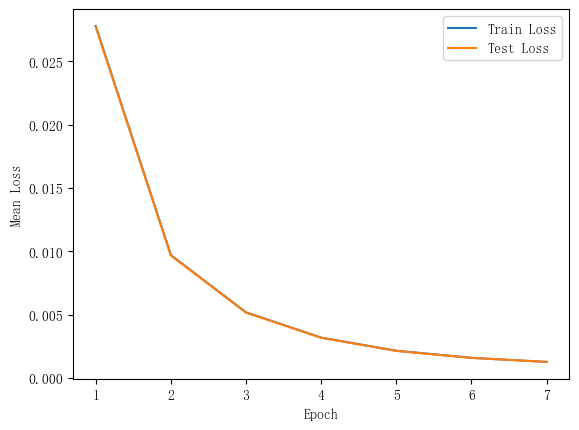

----------------------------------- Epoch: 8/10 -----------------------------------
Batch: 0%, Loss: 0.00104319531431969
Test Loss: 0.0012695251326366674
Batch: 0%, Loss: 0.0010342045462794222
Test Loss: 0.0012389920430077603
Batch: 0%, Loss: 0.001391439542805163
Test Loss: 0.0012489273845318828
Batch: 0%, Loss: 0.0009536259990470141
Test Loss: 0.0012634741161872299
Batch: 0%, Loss: 0.0014758087700505085
Test Loss: 0.0012234574867689963
Batch: 0%, Loss: 0.0010210857682693552
Test Loss: 0.0012236638286817643
Batch: 0%, Loss: 0.0013353068342767287
Test Loss: 0.0012721945932963334
Batch: 0%, Loss: 0.001614995287404868
Test Loss: 0.0012920528121633614
Batch: 0%, Loss: 0.0013043115054974276
Test Loss: 0.0012441388597502613
Batch: 0%, Loss: 0.000965846797623179
Test Loss: 0.0011868090885872825
Batch: 0%, Loss: 0.0015760643329286038
Test Loss: 0.0012109434225746694
Batch: 0%, Loss: 0.0010379097737636194
Test Loss: 0.0012078482941907465
Batch: 0%, Loss: 0.0016412236754135751
Test Loss: 0.00117

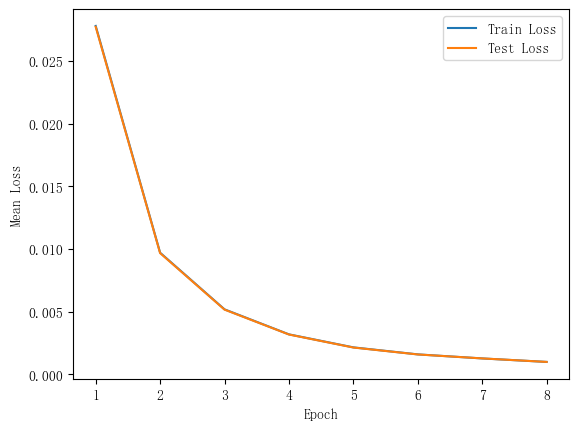

----------------------------------- Epoch: 9/10 -----------------------------------
Batch: 0%, Loss: 0.0009317754337151075
Test Loss: 0.0010168589330785487
Batch: 0%, Loss: 0.0008148067264246261
Test Loss: 0.0009764008809983198
Batch: 0%, Loss: 0.0011507049368279267
Test Loss: 0.001006304677322428
Batch: 0%, Loss: 0.001686438786313015
Test Loss: 0.0010044752634363132
Batch: 0%, Loss: 0.0007094767255945333
Test Loss: 0.0010241495868113883
Batch: 0%, Loss: 0.0011709483030576653
Test Loss: 0.001098413434174396
Batch: 0%, Loss: 0.001387802562230809
Test Loss: 0.0010336779108397068
Batch: 0%, Loss: 0.0011545987109007282
Test Loss: 0.0009528891482895366
Batch: 0%, Loss: 0.0014800522666941344
Test Loss: 0.0009827008575723157
Batch: 0%, Loss: 0.0013032806872944624
Test Loss: 0.001002208601198015
Batch: 0%, Loss: 0.0007270596180233458
Test Loss: 0.0009807299007755523
Batch: 0%, Loss: 0.0011755625225131343
Test Loss: 0.0009683287135623331
Batch: 0%, Loss: 0.0008751503125019763
Test Loss: 0.00095

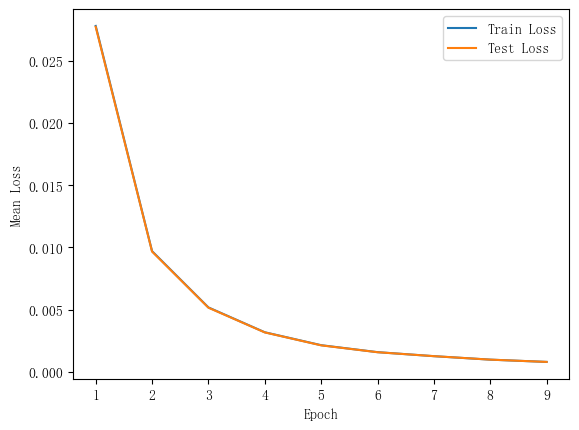

----------------------------------- Epoch: 10/10 -----------------------------------
Batch: 0%, Loss: 0.0005640429507106297
Test Loss: 0.0008035306558065323
Batch: 0%, Loss: 0.0005786602744526276
Test Loss: 0.000812905620107685
Batch: 0%, Loss: 0.0005627944172397279
Test Loss: 0.0007956965813928609
Batch: 0%, Loss: 0.0006153947820103545
Test Loss: 0.0007972319156973252
Batch: 0%, Loss: 0.000830119395646827
Test Loss: 0.0008020930345269421
Batch: 0%, Loss: 0.000738131711007545
Test Loss: 0.0008060367587019654
Batch: 0%, Loss: 0.0007369091375081058
Test Loss: 0.0007842711847615018
Batch: 0%, Loss: 0.000703628417299211
Test Loss: 0.000775230758049865
Batch: 0%, Loss: 0.0008116767255945616
Test Loss: 0.0007881364105244337
Batch: 0%, Loss: 0.0006966975426424901
Test Loss: 0.000790678019512549
Batch: 0%, Loss: 0.0012040400776924334
Test Loss: 0.0008090386797321678
Batch: 0%, Loss: 0.0005697447611304326
Test Loss: 0.0008006121214351181
Batch: 0%, Loss: 0.0005631088335255358
Test Loss: 0.00079

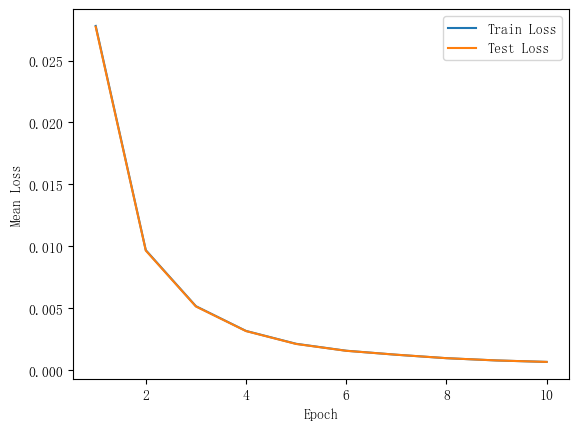

训练集损失: 0.0006803869758706758
测试集损失: 0.0006817254140763596


In [7]:
import sys
sys.path.append(r"../../../") 

from Networks.nn import NN_pricing_GLU
from Networks.train_utils import train_model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


hyperparams = { 
    "input_dim": 4,
    'hidden_dim': 64, 
    'hidden_nums': 4, 
    'output_dim': 88
}

model = NN_pricing_GLU(hyperparams).to(device=device, dtype=torch.float64)

loss_MSE = nn.MSELoss()
optim_Adam = torch.optim.Adam(model.parameters(), lr=0.0001)

tain_loss_lst, test_loss_lst = train_model( 
    loss_MSE, 
    optim_Adam, 
    model, 
    data_loader, 
    train_data, 
    test_data, 
    epochs=10
)

print(f"训练集损失: {tain_loss_lst[-1]}")
print(f"测试集损失: {test_loss_lst[-1]}")



In [8]:
torch.save(model.state_dict(), r"../../../Results/models/GLU_rBergomi_flat_forward_variance.pth")

print("模型已保存")


模型已保存
